https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/prizes

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Reading data and understanding it

In [14]:
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [16]:
df.shape

(412698, 53)

In [13]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [20]:
miss = df.isna().sum()
miss

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [43]:
#amount of missed data
list_miss=[]
for i in miss:
    list_miss.append(i/412698)
dict_miss=dict(zip(miss.index,list_miss))
dict_miss

{'SalesID': 0.0,
 'SalePrice': 0.0,
 'MachineID': 0.0,
 'ModelID': 0.0,
 'datasource': 0.0,
 'auctioneerID': 0.04879112571420264,
 'YearMade': 0.0,
 'MachineHoursCurrentMeter': 0.6425861041245656,
 'UsageBand': 0.8214917445686677,
 'saledate': 0.0,
 'fiModelDesc': 0.0,
 'fiBaseModel': 0.0,
 'fiSecondaryDesc': 0.3409926871465333,
 'fiModelSeries': 0.8578452039990502,
 'fiModelDescriptor': 0.8187148956379725,
 'ProductSize': 0.5248511017741787,
 'fiProductClassDesc': 0.0,
 'state': 0.0,
 'ProductGroup': 0.0,
 'ProductGroupDesc': 0.0,
 'Drive_System': 0.7405197020581636,
 'Enclosure': 0.0008093085016161939,
 'Forks': 0.5209208670747132,
 'Pad_Type': 0.8034979573441112,
 'Ride_Control': 0.6299279376202453,
 'Stick': 0.8034979573441112,
 'Transmission': 0.5444441213671983,
 'Turbocharged': 0.8034979573441112,
 'Blade_Extension': 0.9370411293488217,
 'Blade_Width': 0.9370411293488217,
 'Enclosure_Type': 0.9370411293488217,
 'Engine_Horsepower': 0.9370411293488217,
 'Hydraulics': 0.2000615462

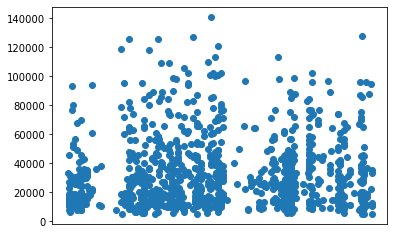

In [70]:
#No usability
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])
plt.xticks(ticks=[]);

<AxesSubplot:ylabel='Frequency'>

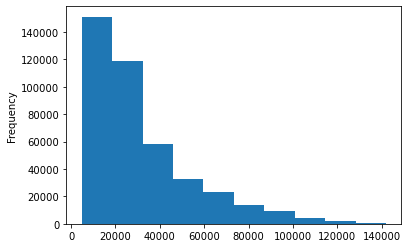

In [62]:
df.SalePrice.plot.hist()

In [64]:
#Parsing dates

df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])

In [65]:
df.saledate.dtype

dtype('<M8[ns]')

In [68]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

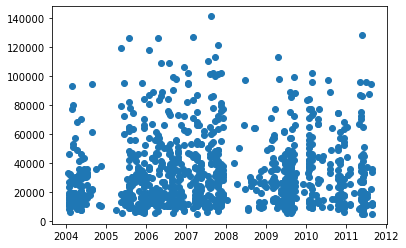

In [71]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [73]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head

<bound method NDFrame.head of 205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
            ...    
409901   2012-04-28
405777   2012-04-28
411889   2012-04-28
411890   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]>

In [75]:
df_copy = df.copy()

# 2. Features and clean data

In [80]:
df_copy['saleYear']=df_copy.saledate.dt.year
df_copy['saleMonth']=df_copy.saledate.dt.month
df_copy['saleDay']=df_copy.saledate.dt.day
df_copy['saleDayOfWeek']=df_copy.saledate.dt.dayofweek
df_copy['saleDayOfYear']=df_copy.saledate.dt.dayofyear

In [81]:
df_copy.drop('saledate', axis=1, inplace=True)

In [82]:
df_copy.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [85]:
#checking for strings
#label - name of column, content - data in column
for label,content in df_copy.items():
        if pd.api.types.is_string_dtype(content):
            print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [84]:
df_copy.items()

<generator object DataFrame.items at 0x000001B0074D09E0>

In [86]:
for label,content in df_copy.items():
        if pd.api.types.is_string_dtype(content):
            df_copy[label] = content.astype('category').cat.as_ordered()

In [87]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [90]:
df_copy.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [91]:
#now all of our objects are numeric data - categories

df_copy.state.cat.codes

205615    43
233186     8
142491     8
115536     8
92301      8
          ..
409901     4
405777     4
411889     4
411890     4
409203     4
Length: 412698, dtype: int8

In [95]:
#missed data
#df_copy.isna().sum()/len(df_copy)
df_copy.isnull().sum()/len(df_copy)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [97]:
#saving current data

df_copy.to_csv('data/bluebook-for-bulldozers/TrainAndValid_v1.csv',index=False)

In [170]:
df_copy=pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid_v1.csv',low_memory=False)

# 3. Filling N/A

In [171]:
#NUMERICAL DATA
for label,content in df_copy.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                print(label, pd.isnull(content).sum())

auctioneerID 20136
MachineHoursCurrentMeter 265194


In [172]:
for label,content in df_copy.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #new column to indicate miss
                df_copy[label+'_is_missing']=pd.isnull(content)
                #filling n/a
                df_copy[label]=content.fillna(content.median())

In [173]:
df_copy.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [174]:
#CATEGORICAL DATA
for label,content in df_copy.items():
        if not pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                print(label, pd.isnull(content).sum())

UsageBand 339028
fiSecondaryDesc 140727
fiModelSeries 354031
fiModelDescriptor 337882
ProductSize 216605
Drive_System 305611
Enclosure 334
Forks 214983
Pad_Type 331602
Ride_Control 259970
Stick 331602
Transmission 224691
Turbocharged 331602
Blade_Extension 386715
Blade_Width 386715
Enclosure_Type 386715
Engine_Horsepower 386715
Hydraulics 82565
Pushblock 386715
Ripper 305753
Scarifier 386704
Tip_Control 386715
Tire_Size 315060
Coupler 192019
Coupler_System 367724
Grouser_Tracks 367823
Hydraulics_Flow 367823
Track_Type 310505
Undercarriage_Pad_Width 309782
Stick_Length 310437
Thumb 310366
Pattern_Changer 310437
Grouser_Type 310505
Backhoe_Mounting 331986
Blade_Type 330823
Travel_Controls 330821
Differential_Type 341134
Steering_Controls 341176


In [175]:
#-1 is a missing data so we do +1 to everything
pd.Categorical(df['UsageBand']).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [176]:
for label,content in df_copy.items():
        if not pd.api.types.is_numeric_dtype(content):
                df_copy[label+'_is_missing']=pd.isnull(content)
                df_copy[label]=pd.Categorical(df['UsageBand']).codes+1

In [177]:
#for label,content in df_copy.items():
#if not pd.api.types.is_numeric_dtype(content):
#            df_copy[label]=pd.Categorical(df['UsageBand']).codes

In [178]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int64(10), int8(44)
memory usage: 76.4 MB


In [179]:
df_copy.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

# 4. Splitting data

In [180]:
df_val = df_copy[df_copy.saleYear == 2012]
df_train = df_copy[df_copy.saleYear != 2012]

In [181]:
len(df_train), len(df_val)

(401125, 11573)

In [183]:
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice

In [184]:
X_train.shape, X_valid.shape

((401125, 102), (11573, 102))

# 5. Custom evaluation

In [185]:
#Root Mean Squared Log Error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_pred):
    """
    Calculates -Root Mean Squared Log Error-
    """
    return np.sqrt(mean_squared_log_error(y_test,y_pred))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Train MAE': mean_absolute_error(y_train, train_preds),
              'Valid MAE': mean_absolute_error(y_valid, val_preds),
              'Train RMSLE': rmsle(y_train, train_preds),
              'Valid RMSLE': rmsle(y_valid, val_preds),
              'Training r^2': r2_score(y_train, train_preds),
             'Valid r^2': r2_score(y_valid, val_preds)}
    return scores    

In [ ]:
#testing on a subset because it is very long
#from sklearn.ensemble import RandomForestRegressor
#
#model = RandomForestRegressor(n_jobs=1, random_state=42)
#
#model.fit(X_train, y_train)
#model.fit(X_train[:10000], y_train[:10000])

In [186]:
#so we can do

model = RandomForestRegressor(n_jobs=1, random_state=42, max_samples = 10000)

model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=1, random_state=42)

In [187]:
show_scores(model)

{'Train MAE': 6379.47080665628,
 'Valid MAE': 8660.024413721594,
 'Train RMSLE': 0.3026458829202573,
 'Valid RMSLE': 0.3799883234377353,
 'Training r^2': 0.8191954327047214,
 'Valid r^2': 0.7678587162469157}

In [ ]:
#%%time
#how much to do this cell
#
#from sklearn.ensemble import RandomForestRegressor
#np.random.seed(42)
#model = RandomForestRegressor(n_jobs=1, random_state=42)
#
#model.fit(df_copy.drop('SalePrice', axis=1), df_tmp['SalePrice'])

# 6. Hyperparameters

In [194]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {'n_estimators': np.arange(10,150,10),
           'max_depth': [None, 3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2),
           'max_features': [0.5,1,'sqrt','auto'],
           'max_samples': [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=1, random_state=42),
                          param_distributions =  rf_grid,
                          n_iter=2,
                          cv=5,
                          verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\Sannsarca\anaconda3\envs\prog_1\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Sannsarca\anaconda3\envs\prog_1\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Sannsarca\anaconda3\envs\prog_1\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

CPU times: total: 1min 46s
Wall time: 1min 46s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])},
                   verbose=True)

In [195]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [196]:
show_scores(rs_model)

{'Train MAE': 7707.958460259782,
 'Valid MAE': 9731.609521731718,
 'Train RMSLE': 0.34968087577138945,
 'Valid RMSLE': 0.40660351546047263,
 'Training r^2': 0.7405339362049881,
 'Valid r^2': 0.6979199415736295}

In [197]:
%%time
ideal_model = RandomForestRegressor(n_jobs=1, 
                                    random_state=42, 
                                    n_estimators =40,
                                    min_samples_split = 14,
                                    min_samples_leaf = 1,
                                    max_samples = None)

ideal_model.fit(X_train,y_train)

CPU times: total: 8min 2s
Wall time: 8min 3s


RandomForestRegressor(min_samples_split=14, n_estimators=40, n_jobs=1,
                      random_state=42)

In [198]:
show_scores(ideal_model)

{'Train MAE': 3224.3284259501816,
 'Valid MAE': 7034.786700888685,
 'Train RMSLE': 0.1604751769358895,
 'Valid RMSLE': 0.3091373650874494,
 'Training r^2': 0.9505806394443673,
 'Valid r^2': 0.8381080025933245}

# 7. Predicting on Test data

In [201]:
df_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv',low_memory=False, parse_dates=['saledate'])
 
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [202]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [203]:
#Preprocessing the data

def process_data(df):
    """
    Preprocessing data
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [205]:
df_test = process_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [207]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,0,0,...,True,True,True,True,True,False,False,False,True,True
1,1728883,1523610,9105,132,99.0,1986,0.0,0,0,0,...,True,True,True,True,True,True,True,True,True,True
2,1508502,1153157,4138,132,99.0,1972,0.0,0,0,0,...,True,True,True,True,True,False,False,False,True,True
3,1452578,1544443,3854,132,99.0,1974,0.0,0,0,0,...,True,True,True,True,True,True,True,True,False,False
4,1403418,1390168,7110,132,99.0,1986,0.0,0,0,0,...,True,True,True,True,True,True,True,True,True,True


In [206]:
#our columns are different
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [208]:
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [209]:
test_preds = ideal_model.predict(df_test)

C:\Users\Sannsarca\anaconda3\envs\prog_1\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [210]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,42910.680862
1,1227844,29803.948195
2,1227847,66166.640007
3,1227848,92483.710851
4,1227863,21194.770689
...,...,...
12452,6643171,72353.817978
12453,6643173,49291.652260
12454,6643184,50004.661544
12455,6643186,52547.706474


In [212]:
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

In [213]:
ideal_model.feature_importances_

array([5.45502800e-02, 2.30149463e-02, 2.36697160e-01, 4.88123312e-04,
       4.97326730e-03, 2.52586232e-01, 4.99695606e-03, 3.41984310e-05,
       3.39516043e-05, 3.70456005e-05, 3.15072134e-05, 2.83563898e-05,
       3.00090082e-05, 3.55881960e-05, 3.70487361e-05, 3.61758518e-05,
       3.59562134e-05, 3.62063385e-05, 3.67840095e-05, 2.78429648e-05,
       3.43364063e-05, 3.52694014e-05, 3.55057369e-05, 3.42290323e-05,
       4.83182990e-05, 3.36208057e-05, 3.43289896e-05, 4.22667650e-05,
       3.58130104e-05, 3.59360262e-05, 4.19463659e-05, 3.44229588e-05,
       3.55724646e-05, 4.48530237e-05, 3.52336243e-05, 3.37487908e-05,
       3.19268260e-05, 3.47497468e-05, 2.89052053e-05, 3.45321025e-05,
       4.04385216e-05, 3.45864976e-05, 3.69678097e-05, 2.72280848e-05,
       3.34083215e-05, 3.21460549e-05, 3.52601221e-05, 3.91773923e-05,
       3.41444091e-05, 3.45358255e-05, 3.33151504e-05, 8.10640388e-02,
       2.49817492e-03, 9.13031727e-03, 4.35998355e-03, 1.55023321e-02,
      

# 8. Feature importance

In [215]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

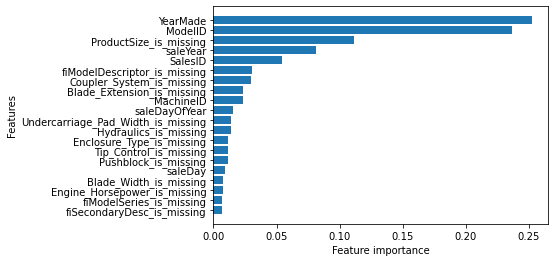

In [216]:
plot_features(X_train.columns, ideal_model.feature_importances_)